In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Simulation of some data
np.random.seed(245)
nobs=100                         # number of observations
x = 2 * np.random.rand(nobs , 1) # Create an array of 100 rows and 1 column
y = -0.5 + 2 * x + np.random.normal(loc=0, scale=2.0, size=nobs).reshape((nobs ,1)) # Draw random samples from a normal (Gaussian) distribution
                                                                                    # mean of  normal distribution is 0 and standard deviation is 2
X = np.c_[np.ones((nobs ,1)),x] # concatenation along the second axis



In [8]:
# x
#X
#np.ones((4,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

$$\hat{\boldsymbol{\beta}} = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{y}$$

$$\hat{\sigma}^2 = \frac{1}{n-p-1} \sum_{i = 1}^n (y_i - \hat{y}_i)^2$$

In [9]:
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y


print("Beta 0",beta_hat [0])
print("Beta 1",beta_hat [1])
print("Standard deviation of epsilon" ,((1/(nobs -1-1))*sum((y- X@ beta_hat )**2))**0.5) # 0.5 mean root to get sigma not sigma squared

Beta 0 [-0.29310097]
Beta 1 [1.76023488]
Standard deviation of epsilon [2.0813267]


Beta 0 [-0.29310097]
Beta 1 [1.76023488]
Standard deviation of epsilon [2.0813267]


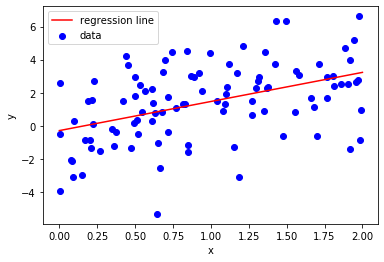

Text(0.5, 0, 'y')

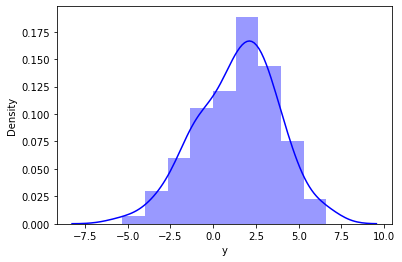

In [14]:
X_new = np.c_[np.ones((2,1)),np.array ([[0] ,[2]])] # new 2*2 array
y_new = X_new @ beta_hat
print("Beta 0",beta_hat [0])
print("Beta 1",beta_hat [1])
print("Standard deviation of epsilon" ,((1/(nobs -1-1))*sum((y- X@ beta_hat )**2))**0.5)

plt.scatter(x, y, color='blue', label='data')
plt.plot(X_new[:,1], y_new , color='red', label='regression line') # plot the line between points (0,-0.29310097) and (2,3.22736878)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

sns.distplot(y, color='blue')
plt.ylabel("Density")
plt.xlabel("y")

In [19]:
X_new
#X_new[:,1]
# y_new
#plt.plot([1,2,3], [1,2,4], 'go-', label='line 1', linewidth=2)


array([[1., 0.],
       [1., 2.]])

# Gradient Descent

$$\boldsymbol{\beta}^{\text{next step}} = \boldsymbol{\beta} - \eta \frac{\partial J(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}},$$ $$\text{with}$$

$$\frac{\partial J(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = \frac{2}{n} \boldsymbol{X}^T(\boldsymbol{X}\boldsymbol{\beta} - \boldsymbol{y})$$

In [31]:
eta = 0.1
epochs = 100    # 100 Schritte
beta_gd = np.array ([[0],[-4]]) # beta values before updating

# 2 Listen wo speichere ich meine Ergebnisse
beta_gd_list = np.array(np.zeros((epochs + 1)*2)). reshape(2,(epochs + 1))
beta_gd_list [:,0] = beta_gd.T


print(beta_gd) # beta value before updating
print('--------------------------')
print(beta_gd_list)
print('--------------------------')
print(beta_gd_list [:,0])


print('--------------------------')
for i in range(0,epochs):
    gradients = 2/len(y) * (X.T @ (X @ beta_gd - y)) # تطبيق القانون فوق
    beta_gd = beta_gd - eta * gradients
    beta_gd_list[:,i+1] = beta_gd.T
    
    
print(beta_gd) # beta value after updating
print('--------------------------')
print(beta_gd_list)
print('--------------------------')
print(beta_gd_list [:,0])

[[ 0]
 [-4]]
--------------------------
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
--------------------------
[ 0. -4.]
--------------------------
[[-0.18793903]
 [ 1.66916877]]
--------------------------
[[ 

In [30]:
#beta_gd_list [:,3]

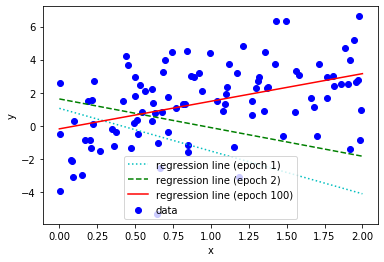

Beta 0 [-0.18793903]
Beta 1 [1.66916877]


In [32]:
plt.scatter(x,y,color = 'blue',label = 'data')

plt.plot(X_new[:,1], X_new @ beta_gd_list[:,1], color='c', label='regression line (epoch 1)', linestyle=':')

plt.plot(X_new[:,1], X_new @ beta_gd_list[:,2], color='green', label='regression line (epoch 2)', linestyle='--')

plt.plot(X_new[:,1], X_new @ beta_gd_list [:,100], color='red', label='regression line (epoch 100)')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print("Beta 0",beta_gd [0])
print("Beta 1",beta_gd [1])

In [33]:
eta2 = 0.025
epochs = 100
beta_gd2 = np.array ([[0],[-4]])
beta_gd_list2 = np.array(np.zeros((epochs + 1)*2)). reshape(2,(epochs + 1))
beta_gd_list2 [:,0] = beta_gd2.T


for i in range(0,epochs):
    gradients = 2/len(y) * (X.T @ (X @ beta_gd2 - y))
    beta_gd2 = beta_gd2 - eta2 * gradients
    beta_gd_list2[:,i+1] = beta_gd2.T
    
print("Beta 0",beta_gd2 [0])
print("Beta 1",beta_gd2 [1])

Beta 0 [1.02457422]
Beta 1 [0.61910229]


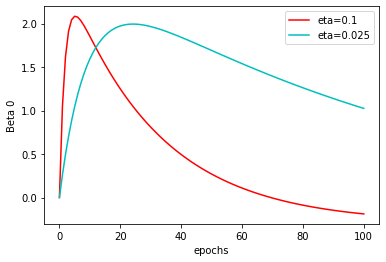

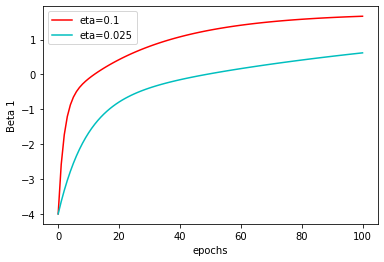

In [34]:
plt.plot(range(0,epochs+1),beta_gd_list[0,:],color='r', label='eta=0.1')
plt.plot(range(0,epochs+1),beta_gd_list2[0,:],color='c', label='eta=0.025')
plt.xlabel('epochs')
plt.ylabel('Beta 0')
plt.legend()
plt.show()

plt.plot(range(0,epochs+1),beta_gd_list[1,:],color='r', label='eta=0.1')
plt.plot(range(0,epochs+1),beta_gd_list2[1,:],color='c', label='eta=0.025')
plt.xlabel('epochs')
plt.ylabel('Beta 1')
plt.legend()